# Task 2: Predict Future Stock Prices (Short-Term)

**Objective:**  
Use historical stock data to predict the next day’s closing price using regression models.

In [19]:
# Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
# Load Dataset
stock_symbol = "AAPL"
data = yf.download(stock_symbol, start="2023-01-01", end="2025-01-01")

data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211197,128.954545,122.324571,128.343764,112117500
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600
2023-01-05,123.161942,125.871071,122.905811,125.240583,80962700
2023-01-06,127.693573,128.353614,123.033875,124.137232,87754700
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800


In [21]:
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]

# Predict next day's closing price
y = data['Close'].shift(-1)

# Remove last row with NaN target
X = X[:-1]
y = y[:-1]

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [23]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.619977262423324


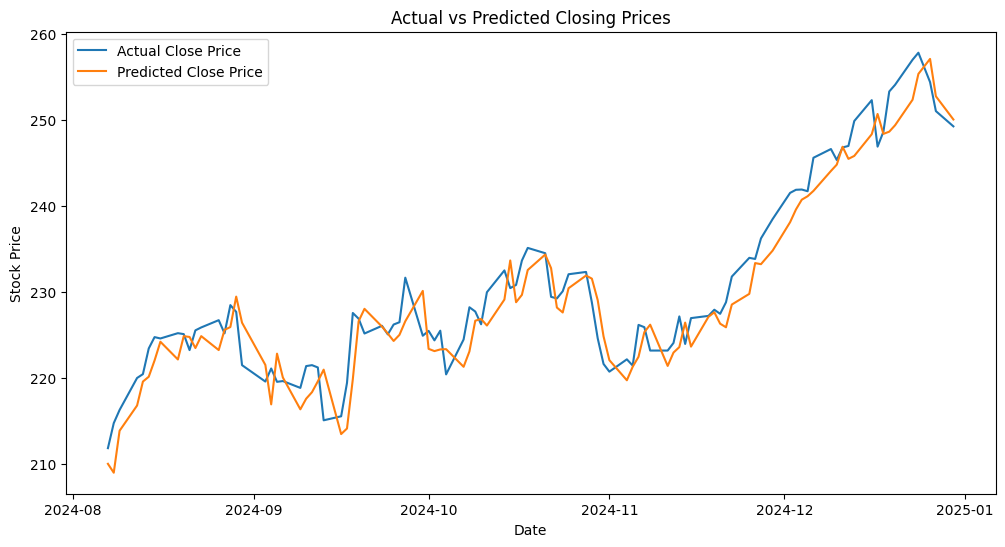

In [25]:
# Visualization
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Close Price")
plt.plot(y_test.index, y_pred, label="Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Closing Prices")
plt.legend()
plt.show()

## Final Insights

- Historical stock data was collected using the Yahoo Finance API.
- Linear Regression was used to predict next-day closing prices.
- Time-series order was preserved during training.
- The model provides reasonable short-term predictions but is not suitable for long-term forecasting.